In [176]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

In [177]:
cv2.__version__

'4.5.1'

In [178]:
img = cv2.imread('./IMG_3965.jpg')

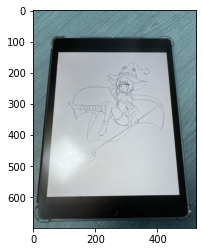

In [179]:
ratio = 700 / img.shape[0]
dim = (int(img.shape[1] * ratio), 700)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(img)

In [180]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

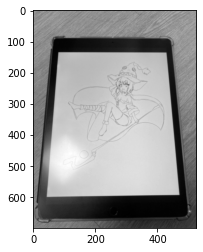

In [181]:
gray = cv2.GaussianBlur(gray, (3, 3), 0)
plt.imshow(gray, cmap='gray')

In [182]:
edge = cv2.Canny(gray, 100, 200)

In [183]:
contours, hierachy = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [184]:
contours_img = img.copy()

In [185]:
cv2.drawContours(contours_img, contours, -1, (0, 255, 0), 1)

array([[[113, 151, 156],
        [112, 150, 155],
        [117, 155, 160],
        ...,
        [138, 175, 183],
        [116, 153, 161],
        [126, 163, 171]],

       [[113, 151, 156],
        [115, 153, 158],
        [111, 149, 154],
        ...,
        [112, 149, 157],
        [129, 166, 174],
        [134, 171, 179]],

       [[107, 145, 150],
        [111, 149, 154],
        [107, 145, 150],
        ...,
        [140, 177, 185],
        [141, 178, 186],
        [114, 151, 159]],

       ...,

       [[100, 128, 131],
        [101, 128, 132],
        [102, 128, 132],
        ...,
        [ 46,  72,  78],
        [ 33,  58,  64],
        [ 38,  64,  70]],

       [[ 99, 126, 130],
        [102, 129, 133],
        [ 99, 125, 130],
        ...,
        [ 40,  65,  71],
        [ 39,  64,  70],
        [ 42,  67,  74]],

       [[102, 132, 133],
        [ 98, 127, 129],
        [ 92, 120, 123],
        ...,
        [ 35,  62,  67],
        [ 46,  73,  78],
        [ 39,  66,  71]]

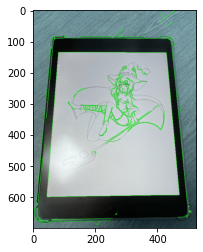

In [186]:
plt.imshow(contours_img)

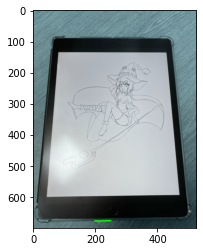

In [187]:
cnt = contours[0]
contours_img_cnt = img.copy()
cv2.drawContours(contours_img_cnt, [cnt], 0, (0, 255, 0), 3)
plt.imshow(contours_img_cnt)

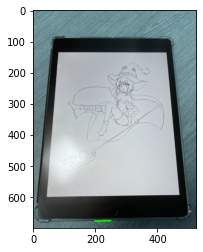

In [188]:
epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
contours_img_approx = img.copy()
cv2.drawContours(contours_img_approx, [approx], 0, (0, 255, 0), 3)
plt.imshow(contours_img_approx)

In [189]:
contours_sorted = sorted(contours, key = cv2.contourArea, reverse=True)[:1]

for cnt in contours_sorted:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
    if len(approx) == 4:
        print("found")
        screenCnt = approx
        break
    else:
        tmp_img = img.copy()
        cv2.drawContours(tmp_img, [approx], -1, (0, 255, 0), 3)
        plt.imshow(tmp_img)

found


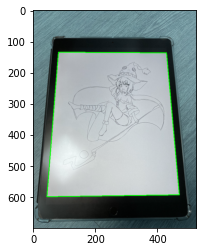

In [190]:
contours_img_bigbox = img.copy()
cv2.drawContours(contours_img_bigbox, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(contours_img_bigbox)
